# Simple CNN Implemented using Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9085 - loss: 0.2917 - val_accuracy: 0.9872 - val_loss: 0.0402
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0428 - val_accuracy: 0.9895 - val_loss: 0.0321
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9908 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9918 - val_loss: 0.0261
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9958 - loss: 0.0143 - val_accuracy: 0.9900 - val_loss: 0.0303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0402
Test accuracy: 0.9900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Implement an End to End CNN Model for Image Classification Task.

In [2]:
!unzip "/content/FruitinAmazon.zip"

Archive:  /content/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train

# Task 1: Data Understanding and Visualization

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models

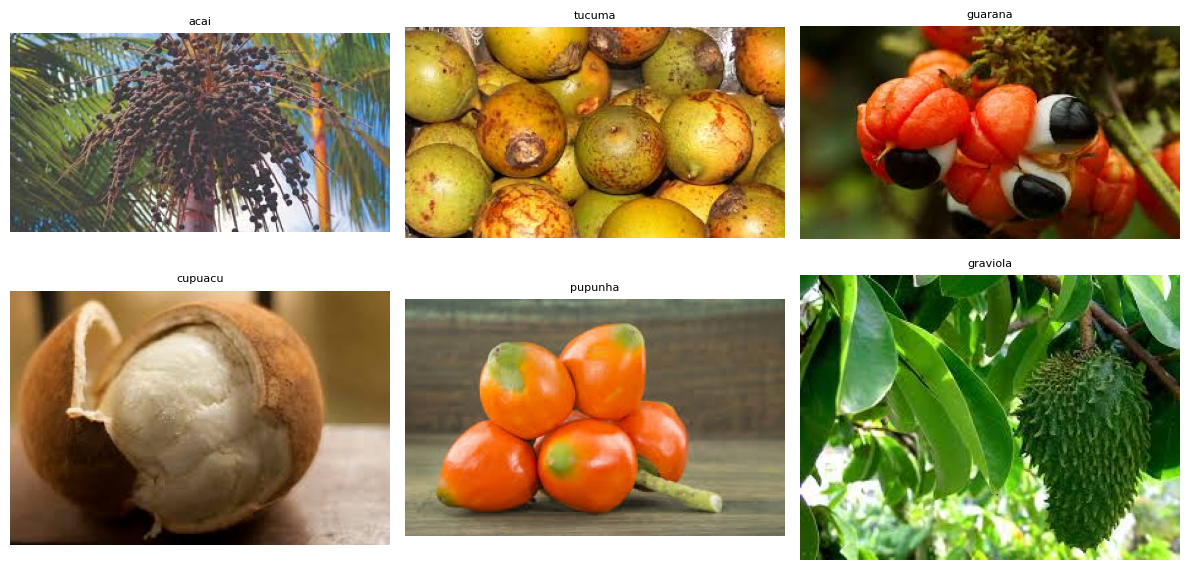

In [4]:
train_folder = '/content/FruitinAmazon/train'

try:
    class_dirs = [d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))]

    selected_images = []
    class_labels = []
    for class_dir in class_dirs:
        class_folder = os.path.join(train_folder, class_dir)
        images = [f for f in os.listdir(class_folder) if f.endswith(('jpg', 'jpeg', 'png'))]

        if images:
            random_image = random.choice(images)
            image_path = os.path.join(class_folder, random_image)
            selected_images.append(image_path)
            class_labels.append(class_dir)
        else:
            print(f"Warning: No images found in class directory: {class_dir}")

    num_classes = len(selected_images)
    if num_classes > 0:
        num_rows = 2
        num_cols = (num_classes + num_rows - 1) // num_rows

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
        axes = axes.flatten()

        for i, image_path in enumerate(selected_images):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_labels[i], fontsize=8)

        for j in range(num_classes, num_rows * num_cols):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("No class directories with images found in the specified train folder.")

except FileNotFoundError:
    print(f"Error: The train folder '{train_folder}' was not found. Please make sure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

What did you Observe?

I observed an image containing six empty plots arranged horizontally. Each plot has axes ranging from 0.0 to 1.0 on both the x and y axes. There are no data points, lines, or any other visual elements within the plots themselves.


Check for Corrupted Image

In [5]:
def find_and_remove_corrupted_images(train_folder):
    """
    Verifies images in the train directory for corruption.
    Removes any corrupted images and prints a message.

    Args:
        train_folder (str): The path to the main training directory.
                           This directory should contain subdirectories,
                           each representing a class of images.
    """
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    img = Image.open(image_path)
                    img.verify()  # Verify the image file is intact
                    img.close()
                except (IOError, SyntaxError) as e:
                    print(f"Found corrupted image: {image_path} - {e}")
                    os.remove(image_path)
                    corrupted_images.append(image_path)
                except Exception as e:
                    print(f"An unexpected error occurred while checking {image_path}: {e}")

    if corrupted_images:
        print("\n--- Corrupted Images Removed ---")
        for img_path in corrupted_images:
            print(f"Removed corrupted image: {img_path}")
    else:
        print("No Corrupted Images Found.")

if __name__ == "__main__":
    train_directory = '/content/FruitinAmazon/train'
    find_and_remove_corrupted_images(train_directory)

No Corrupted Images Found.


# Task 2: Loading and Preprocessing Image Data in keras


In [6]:
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

train_dir = '/content/FruitinAmazon/train'

rescale = tf.keras.layers.Rescaling(1./255)

try:
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    print("Training Dataset:")
    for image_batch, labels_batch in train_ds.take(1):
        print(f"  Image batch shape: {image_batch.shape}")
        print(f"  Labels batch shape: {labels_batch.shape}")
        print(f"  Example labels: {labels_batch.numpy()}")

    print("\nValidation Dataset:")
    for image_batch, labels_batch in val_ds.take(1):
        print(f"  Image batch shape: {image_batch.shape}")
        print(f"  Labels batch shape: {labels_batch.shape}")
        print(f"  Example labels: {labels_batch.numpy()}")

    class_names = train_ds.class_names
    print(f"\nClass names: {class_names}")

except FileNotFoundError:
    print(f"Error: The directory '{train_dir}' was not found. Please make sure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training Dataset:
  Image batch shape: (32, 128, 128, 3)
  Labels batch shape: (32,)
  Example labels: [1 0 5 4 4 5 2 3 0 4 0 3 3 3 0 0 5 5 2 5 3 4 2 1 5 0 2 4 3 0 1 1]

Validation Dataset:
  Image batch shape: (18, 128, 128, 3)
  Labels batch shape: (18,)
  Example labels: [4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
An error occurred: '_MapDataset' object has no attribute 'class_names'


# Task 3 - Implement a CNN

In [7]:
def create_cnn_model(num_classes, input_shape=(128, 128, 3)):
    """
    Creates a Convolutional Neural Network (CNN) model with the specified architecture.

    Args:
        num_classes (int): The number of output classes for the classification task.
        input_shape (tuple): The expected input shape of the images (height, width, channels).
                             Defaults to (128, 128, 3) for RGB images.

    Returns:
        tf.keras.Model: The compiled CNN model.
    """
    model = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1, 1),
                      activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1),
                      activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Flatten(),

        layers.Dense(units=128, activation='relu'),

        layers.Dense(units=num_classes, activation='softmax')
    ])
    return model

if __name__ == '__main__':
    num_classes = 10
    input_shape = (128, 128, 3)

    cnn_model = create_cnn_model(num_classes, input_shape)

    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,409,418 (32.08 MB)

 Trainable params: 8,409,418 (32.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Compile the module
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

checkpoint_cb = ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1
)
early_stopping_cb = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True, verbose=1
)

#Train the module
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.9902 - loss: 0.0415
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9891 - loss: 0.0456 - val_accuracy: 0.1667 - val_loss: 6.7148
Epoch 2/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8438 - loss: 1.3071
Epoch 2: val_accuracy improved from 0.16667 to 0.88889, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8633 - loss: 0.8964 - val_accuracy: 0.8889 - val_loss: 0.2464
Epoch 3/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9688 - loss: 0.0484
Epoch 3: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9379 - loss: 0.1377 - val_accuracy: 0.8333 - val_loss: 0.4907
Epoch 4/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9688 - loss: 0.1526
Epoch 4: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9635 - loss: 0.1432 - val_accuracy: 0.8333 - val_loss: 0.5245
Epoch 5/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9688 - loss: 0.1407
Epoch 5: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9813 - loss: 0.1459 - val_accuracy: 0.8333 - val_loss: 0.4499
Epoch 6/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.1191
Epoch 6: val_accuracy did not improve from 0.88889
3/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9444 - val_loss: 0.2776
Epoch 9/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 9: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.8889 - val_loss: 0.4563
Epoch 10/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 10: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8889 - val_loss: 0.5529
Epoch 11/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 11: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8889 - val_loss: 0.4826
Epoch 12/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 5.3279e-04
Epoch 12: val_accuracy did not improve from 0

# Task 5: Evaluate the Model

In [17]:
# evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5667 - loss: 1.2126
Test Accuracy: 0.5667
Test Loss: 1.2126


# Task 6: Save and Load the Model

In [24]:
cnn_model.save("my_cnn_model.h5")
print("Model saved successfully!")

loaded_model = load_model("my_cnn_model.h5")
print("Model loaded successfully!")


test_loss, test_accuracy = loaded_model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Model saved successfully!
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - accuracy: 0.5667 - loss: 1.2126
Test Accuracy: 0.5667
Test Loss: 1.2126


# Task 7: Predictions and Classification Report

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.60      0.60      0.60         5
           2       0.45      1.00      0.62         5
           3       1.00      0.40      0.57         5
           4       0.75      0.60      0.67         5
           5       0.33      0.40      0.36         5

    accuracy                           0.57        30
   macro avg       0.69      0.57      0.57        30
weighted avg       0.69      0.57      0.57        30



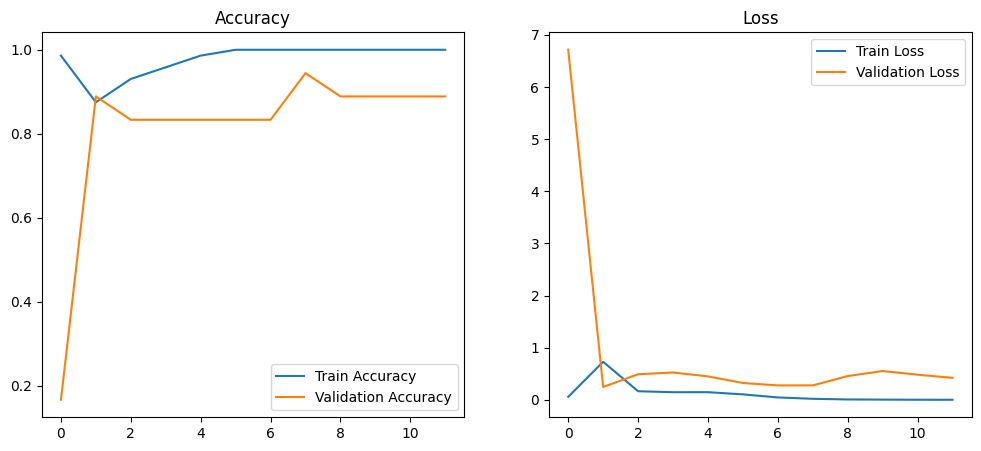

In [25]:
y_pred_probs = loaded_model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

!pip install scikit-learn
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

Aplt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()